# Importing Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from regression_analysis.fit_model import linear_regression
from regression_analysis.utils import franke
from regression_analysis.utils.plots import triangulation_for_triheatmap as triheatmap
from regression_analysis.fit_model.apply_regression import plot_stat, apply_regression
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.tri import Triangulation
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import linear_model

import ipywidgets as widget
from ipywidgets import interact, interactive, fixed, interact_manual

import glob as glob
from IPython.display import Image, display, HTML, Video

import multiprocessing as mp

import os
if not os.path.exists('data'):
    os.makedirs('data')
#note my bootstrap can be wrong. 

print("Number of processors: ", mp.cpu_count())

Number of processors:  8


# Demo for applying regression to Franke data 

In [7]:
n = 100 #number of data points along each axis. Total data points = n*n
x1 = np.linspace(0,1,n)
x2 = np.linspace(0,1,n)
xx1, xx2 = np.meshgrid(x1, x2)
xx1 = xx1.reshape((n*n),1)
xx2 = xx2.reshape((n*n),1)

y = franke.Franke(xx1, xx2, noise_var=0.0) #zero mean gaussian noise has variance = var
print(np.max(y))

1.2195347797082343


In [8]:
#create linear regression object by passing input and output data
linear_reg = linear_regression.linear_regression2D(xx1, xx2, y) 

## Apply OLS 

In [11]:
print("own OLS")
linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

print('\n'+ "Scikit OLS")
linear_reg.apply_leastsquares(order=0, test_ratio=0.1, reg_method="scikit_ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

own OLS
Train MSE 0.0554590261805372
Test MSE 0.05584068357048802
Train R2 0.0
Test R2 -0.0002847332966746663
Train bias 0.0554590261805372
Test bias 0.05584068357048802
Train model variance 0.0
Test model variance 0.0

Scikit OLS
Train MSE 0.05548739582909749
Test MSE 0.05559637089653459
Train R2 0.0
Test R2 -0.0022721479687413115
Train bias 0.05548739582909749
Test bias 0.055596370896534596
Train model variance 1.232595164407831e-32
Test model variance 1.232595164407831e-32


In [15]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0013984075597923648
Test MSE 0.0014191812974061926
Train R2 0.9748106659930454
Test R2 0.9744979106233543
Train bias 0.0018104209880546618
Test bias 0.0019122420643262294
Train model variance 0.001765408345740457
Test model variance 0.001850878989683649


## Apply OLS with cross validation sampling

In [16]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, reg_method="ols")
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.0014020558315986742
Test MSE 0.0014115837027936719
Train R2 0.9747354984047293
Test R2 0.9744913454989845
Train bias 0.005549463422831002
Test bias 0.005542721905209514
Train model variance 0.005409013488928224
Test model variance 0.005418968233973594


## Apply Ridge regression 

In [65]:
print("own ridge")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

print('\n'+"scikit ridge")
linear_reg.apply_leastsquares(order=5, test_ratio=0.1, reg_method="scikit_ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

own ridge
1.0
1.0
(9000, 21)
(21, 1)
[[ 0.85648604]
 [ 0.22686737]
 [-0.39382138]
 [-1.94400369]
 [ 0.85666587]
 [-1.20010666]
 [-0.2266717 ]
 [-0.46105008]
 [ 0.66804904]
 [ 0.55500725]
 [ 0.7888456 ]
 [-0.22502533]
 [-0.04682789]
 [ 0.41986084]
 [ 0.66013244]
 [ 0.63283113]
 [ 0.01816318]
 [-0.08399274]
 [-0.13078503]
 [-0.38594566]
 [-0.50162792]]
Train MSE 0.005689427245090883
Test MSE 0.005529876348888792
Train R2 0.898083053024311
Test R2 0.8947159022533758
Train bias 0.05582416037323484
Test bias 0.05252733330158577
Train model variance 0.04818674769916403
Test model variance 0.046818286240102994

scikit ridge
1.0
1.0
(9000, 21)
(9000, 1)
(9000, 21)
(21, 1)
[[ 0.85616429]
 [ 0.22756551]
 [-0.40751542]
 [-1.93595408]
 [ 0.87338052]
 [-1.18414512]
 [-0.23712284]
 [-0.4671229 ]
 [ 0.65983078]
 [ 0.56264505]
 [ 0.78356845]
 [-0.22996667]
 [-0.05872132]
 [ 0.4136    ]
 [ 0.65621241]
 [ 0.64018857]
 [ 0.02590215]
 [-0.08258275]
 [-0.12530246]
 [-0.38101573]
 [-0.50854297]]
Train MSE 0

## Apply Ridge regression with bootstrap

In [18]:
linear_reg.apply_leastsquares_bootstrap(order=5, test_ratio=0.1, n_boots=30, reg_method="ridge", lmbda=0.9)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.005669000683865771
Test MSE 0.005656011297328789
Train R2 0.8980103276891687
Test R2 0.8976890963036638
Train bias 0.0018518831325762034
Test bias 0.0017989358304626917
Train model variance 0.0015987095727156753
Test model variance 0.001608195369992491


## Apply Ridge regression with cross validation

In [35]:
linear_reg.apply_leastsquares_crossvalidation(order=5, kfolds=10, reg_method="ridge", lmbda=0.1)
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)

Train MSE 0.003587371509561613
Test MSE 0.003598697903548515
Train R2 0.9353554974487096
Test R2 0.9349328061035251
Train bias 0.005513842728240411
Test bias 0.005844128766990735
Train model variance 0.004963311799368649
Test model variance 0.005378989319189013


## Apply Lasso regression: Not working properly. High R2 value

In [112]:
lam = np.logspace(-3,3,5)
print(lam)
for lmbda in lam:
    linear_reg.apply_leastsquares(order=1, test_ratio=0.1, reg_method="scikit_lasso", lmbda=0.01)
    print("Test MSE", linear_reg.testMSE)

"""
print("Train MSE", linear_reg.trainMSE)
print("Test MSE", linear_reg.testMSE)
print("Train R2", linear_reg.trainR2)
print("Test R2", linear_reg.testR2)
print("Train bias", linear_reg.trainbias)
print("Test bias", linear_reg.testbias)
print("Train model variance", linear_reg.trainvar)
print("Test model variance", linear_reg.testvar)
"""

[1.00000000e-03 3.16227766e-02 1.00000000e+00 3.16227766e+01
 1.00000000e+03]
parameter [ 0.62347834 -0.36934721 -0.23393176]
Test MSE 0.020093601885187568
parameter [ 0.62380736 -0.37052435 -0.2343758 ]
Test MSE 0.021480376072250635
parameter [ 0.62643308 -0.3730867  -0.23503329]
Test MSE 0.020032641002605017
parameter [ 0.62285917 -0.37058957 -0.2332106 ]
Test MSE 0.022701051023913343
parameter [ 0.62229211 -0.36887451 -0.23294795]
Test MSE 0.02144851062269013


'\nprint("Train MSE", linear_reg.trainMSE)\nprint("Test MSE", linear_reg.testMSE)\nprint("Train R2", linear_reg.trainR2)\nprint("Test R2", linear_reg.testR2)\nprint("Train bias", linear_reg.trainbias)\nprint("Test bias", linear_reg.testbias)\nprint("Train model variance", linear_reg.trainvar)\nprint("Test model variance", linear_reg.testvar)\n'

# Regression Comparisons

In [5]:
# For all methods except OLS we apply the following parameters
order = np.arange(1,13)
num_points = np.array([25, 50, 75, 100])
noise_var = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
test_ratio_array = np.round(np.arange(1,5)*0.1, 2)

n_boots = np.array([5, 10], dtype=int)
k_folds = np.array([5, 10], dtype=int)
ridge_lambda = np.array([0.001, 0.01, 0.1, 1.0])
lasso_lambda = np.array([0.00001, 0.0001, 0.001, 0.01])#, 10.0])
print(lasso_lambda)
print(test_ratio_array)

[1.e-05 1.e-04 1.e-03 1.e-02]
[0.1 0.2 0.3 0.4]


In [117]:
# Save values in numpy file format
np.save("data/order.npy", order)
np.save("data/num_points.npy", num_points)
np.save("data/noise_var.npy", noise_var)
np.save("data/test_ratio_array.npy", test_ratio_array)
np.save("data/k_folds.npy", k_folds)
np.save("data/n_boots.npy", n_boots)
np.save("data/ridge_lambda.npy", ridge_lambda)
np.save("data/lasso_lambda.npy", lasso_lambda)

Perform
* Ordinary Least Squares(OLS) with scikit-learn test train split, own bootstrap, own cross-validation
* Ridge Regression(RR) with scikit-learn test train split, own bootstrap, own cross-validation
* Scikit Lasso Regression(LR) with scikit-learn test train split, own bootstrap, own cross-validation
* Scikit OLS with scikit-learn test train split. Note: this is just for comparing OLS to Scikit-OLS
* Scikit RR with scikit-learn test train split. Note: this is just for comparing OLS to Scikit-OLS

and save output.

In [6]:
methods = ["ols", "ols_bootstrap", "ols_crossvalidation", "ridge", "ridge_bootstrap", "ridge_crossvalidation",
           "lasso", "lasso_bootstrap", "lasso_crossvalidation"]
stats = ["train MSE", "test MSE", "test R2", "train R2", "test bias", "test variance"]
print(lasso_lambda)
widget.interact(plot_stat, ratio=test_ratio_array.tolist(), num=num_points.tolist(), stat=stats, 
                method=methods, k_fold=k_folds.tolist(), n_boot=n_boots.tolist(),
                ridge_lmb=ridge_lambda.tolist(), lasso_lmb=lasso_lambda.tolist())

[1.e-05 1.e-04 1.e-03 1.e-02]


interactive(children=(Dropdown(description='ratio', options=(0.1, 0.2, 0.3, 0.4), value=0.1), Dropdown(descrip…

<function regression_analysis.fit_model.apply_regression.plot_stat(ratio=0.1, num=100, stat='test MSE', method='ols', n_boot=1000, k_fold=1000, ridge_lmb=122.0, lasso_lmb=112.2)>

# Bias Variance Tradeoff

In [34]:
#loading data
method = "ols"
order=np.load("data/order.npy")
num_points=np.load("data/num_points.npy")
noise_var=np.load("data/noise_var.npy")
test_ratio_array=np.load("data/test_ratio_array.npy")
ridge_lambda=np.load("data/ridge_lambda.npy")
k_folds=np.load("data/k_folds.npy")
n_boots=np.load("data/n_boots.npy")
train_MSE=np.load("data/train_MSE"+method+".npy")
test_MSE=np.load("data/test_MSE"+method+".npy")
train_R2=np.load("data/train_R2"+method+".npy")
test_R2=np.load("data/test_R2"+method+".npy")
test_bias=np.load("data/test_bias"+method+".npy")
test_var=np.load("data/test_variance"+method+".npy")

For Ordinary least squares, we find the bias variance tradeoff as a function of model complexity: order of polynomial. We determine it for fixed test ratio and noise level

Text(0.5, 0, 'order of ploynomial')

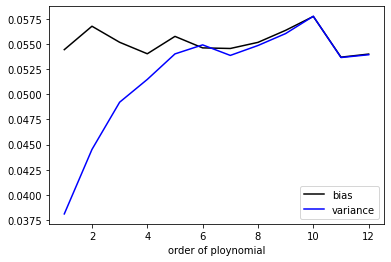

In [39]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_bias, 'k', label = "bias")
ax.plot(order, ols_var, 'b', label = "variance")
ax.legend()
ax.set_xlabel("order of ploynomial")


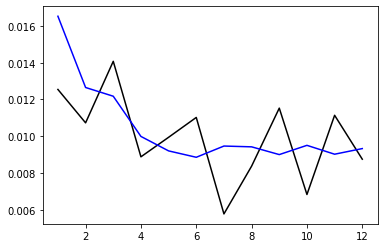

In [30]:
r_ind = 0 # r=0.1
n_ind = 0 # n=100
noise_ind = 4 #noise variance = 0.5
ols_testMSE = test_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_trainMSE = train_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_testMSE, 'k')
ax.plot(order, ols_trainMSE, 'b')

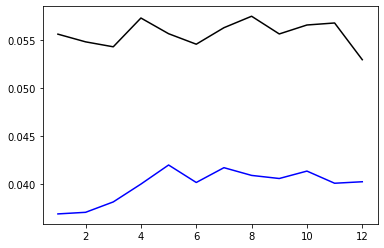

In [31]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_bias = test_bias[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_var = test_var[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_bias, 'k')
ax.plot(order, ols_var, 'b')

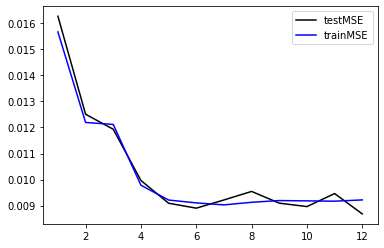

In [32]:
r_ind = 1 # r=0.1
n_ind = 3 # n=100
noise_ind = 2 #noise variance = 0.5
ols_testMSE = test_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]
ols_trainMSE = train_MSE[:, n_ind, noise_ind, r_ind, 0, 0, 0]

fig, ax = plt.subplots()
ax.plot(order, ols_testMSE, 'k', label="testMSE")
ax.plot(order, ols_trainMSE, 'b', label="trainMSE")
ax.legend()